# Centro Cirúrgico : Modelo preditivo e Storytelling

Definição do Problema de Negócio
Com base em informações operacionais do Centro Cirúrgico de um grande hospital compreendendo o período completo de 2019 a 2020, onde todos os dados foram anonimizados seguindo as melhores práticas e recomendações internacionais, foi solicitado para efeitos de uma gestão mais eficiente a elaboração de informações analíticas para auxílio às tomadas de decisão. Tanto a produção de análises descritivas e indicadores quanto a automação de informações com caráter preditivo são esperados pela área como objetos dessa solicitação.

IMPORTANTE

Informações como procedimentos cirúrgicos mais realizados, tipo, porte, especialidade e duração das cirugias são de grande importância para a área.

Base de Dados
Como parte da estratégia elaborada para esse DATATHON, a base de dados (em formato CSV) será disponibilizada em sala de aula no início das atividades.

Prazos e Entrega
Os alunos poderão realizar a atividade de forma individual ou em grupo de até 5 pessoas. O prazo para a entrega é de até 15 dias corridos do início do DATATHON, devendo ser enviada por e-mail para rodrigosignorini@outlook.com. A entregua consiste em:

#1. Notebook: Todo o processo de desenvolvimento deverá ser apresentado de forma bem estruturada, bem definida e muito bem embasada. Todo o percurso, desde a importação dos dados e suas respectivas análises e preparações para a devida entrega aos algoritmos de Machine Learning até a avaliação final do modelo escolhido, deve ser percorrido utilizando-se os conceitos, as técnicas e as ferramentas aprendidas em sala de aula.

#2. Storytelling: Diferentemente do embasamento estritamente técnico apresentado via notebook, deverá ser entregue um documento - em plataforma a escolher - elaborado de forma que os resultados obtidos possam ser comunicados eficientemente a qualquer tipo de público, técnico ou não. Para tanto, elementos como um excelente entendimento sobre o contexto, a escolha de uma apresentação visual adequada, sem excessos e com foco nos objetivos são a chave para que se possa contar uma boa história com os dados

Estrutura do trabalho
1. Bibliotecas
2. Importando os dados
3. Explorando os dados
4. Extraindo informações
4.1 Idade dos pacientes
4.2 Sexo dos pacientes
4.3 Procedimentos cirúrgicos mais realizados
4.4 Tipos de atendimento e passagens 
4.5 Porte das cirurgias realizadas
4.6 Especialidades dos procedimentos
4.7 Quantidade de procedimentos realizados por médicos
4.8 Tempo de duração das cirurgias
5. Verificando dados nulos
6. Features e target
7. Limpeza de dados
8. Preparando os dados para machine learning
    8.1 Criando o arquivo de treinamento e teste
9. Conclusão

# 1.Bibliotecas

In [1]:
#Biblioteca para operações matemáticas
import numpy as np 

# Biblioteca para processar arquivo csv
import pandas as pd 

# Biblioteca para plotar gráficos
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind 
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy import stats



# 2. Importando os dados

In [8]:
 #dataset = pd.read_csv('data/datathon_CC.csv')
 dataset = pd.read_csv(r'C:/Users/dsantos2/Downloads/Trabalho - Estagio/data/PGDSIS_estagio_v02.CSV', sep=';')   

In [97]:
# Transformar dados textuais em letras minúsculas
dataset['sexo'] = dataset['sexo'].str.lower()
dataset['tipo_atendimento'] = dataset['tipo_atendimento'].str.lower()
dataset['tipo_passagem'] = dataset['tipo_passagem'].str.lower()
dataset['procedimento_cirurgico'] = dataset['procedimento_cirurgico'].str.lower()
dataset['especialidade_procedimento'] = dataset['especialidade_procedimento'].str.lower()
dataset['tecnica_cirurgica'] = dataset['tecnica_cirurgica'].str.lower()
dataset['potencial_contaminacao'] = dataset['potencial_contaminacao'].str.lower()
dataset['porte'] = dataset['porte'].str.lower()
dataset['especialidade_cirurgiao'] = dataset['especialidade_cirurgiao'].str.lower()
dataset['intercorrencia_intraop'] = dataset['intercorrencia_intraop'].str.lower()
dataset['tipo_intercorrencia_intraop'] = dataset['tipo_intercorrencia_intraop'].str.lower()

In [98]:
# Grava o DataFrame atualizado no disco como CSV
file = 'data/datathon_CC_01.csv'
dataset.to_csv(file, header = True, index = False)

In [99]:
#Criar variáveis categorizadas
dataset = pd.read_csv('data/datathon_CC_01.csv', encoding='ISO-8859-1',dtype={'sexo':'category','tipo_atendimento':'category',
                                                                               'tipo_passagem':'category','procedimento_cirurgico':'category',
                                                                               'especialidade_procedimento':'category','tecnica_cirurgica':'category','potencial_contaminacao':'category',
                                                                               'porte':'category','especialidade_cirurgiao':'category',
                                                                               'intercorrencia_intraop':'category','tipo_intercorrencia_intraop':'category' } )
    

In [100]:
#Categorização das variáveis
dataset['sexo_cod'] = dataset['sexo'].cat.codes
dataset['tipo_atendimento_cod'] = dataset['tipo_atendimento'].cat.codes
dataset['tipo_passagem_cod'] = dataset['tipo_passagem'].cat.codes
dataset['procedimento_cirurgico_cod'] = dataset['procedimento_cirurgico'].cat.codes
dataset['especialidade_procedimento_cod'] = dataset['especialidade_procedimento'].cat.codes
dataset['tecnica_cirurgica_cod'] = dataset['tecnica_cirurgica'].cat.codes
dataset['potencial_contaminacao_cod'] = dataset['potencial_contaminacao'].cat.codes
dataset['porte_cod'] = dataset['porte'].cat.codes
dataset['especialidade_cirurgiao_cod'] = dataset['especialidade_cirurgiao'].cat.codes
dataset['intercorrencia_intraop_cod'] = dataset['intercorrencia_intraop'].cat.codes
dataset['tipo_intercorrencia_intraop_cod'] = dataset['tipo_intercorrencia_intraop'].cat.codes


# 3. Explorando os dados

In [4]:
# Verificando as primeiras linhas do dataset
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
dataset.head(30)

,Unnamed: 0,nascimento,sexo,data_entrada,data_saida,tipo_atendimento,tipo_passagem,procedimento_cirurgico,especialidade_procedimento,tecnica_cirurgica,potencial_contaminacao,porte,medico,especialidade_cirurgiao,asa,intercorrencia_intraop,tipo_intercorrencia_intraop
0,0,1997-08-19,feminino,2019-01-23 13:49:31,2019-01-23 16:51:20,clinica cirurgica,internado,"osteoplastia para prognatismo, micrognatismo o...",cabeça e pescoço,convencional,classe ii - potencialmente contaminada,p4,Lucas da Rosa,cirurgia buco-maxilo-facial,I,não,não informado
1,1,1965-01-29,feminino,2019-01-11 06:28:53,2019-01-11 14:59:42,clinica cirurgica,internado,microcirurgia para tumores intracranianos,neurocirurgia,convencional,classe i - limpa,p7,Gabrielly da Cunha,neurocirurgia,II,não,não informado
2,2,1965-08-05,masculino,2019-01-09 06:43:51,2019-01-09 10:50:57,clinica medica,internado,cirurgia intracraniana por via endoscópica,neurocirurgia,vídeo,classe i - limpa,p5,Caio Peixoto,neurocirurgia,II,não,não informado
3,3,1988-04-18,masculino,2019-01-10 06:02:59,2019-01-10 09:25:47,clinica cirurgica,internado,gastroplastia para obesidade mórbida por video...,cirurgia geral,vídeo,classe ii - potencialmente contaminada,p5,Thiago da Mota,cirurgia do aparelho digestivo,II,não,não informado
4,4,1965-06-21,feminino,2019-01-10 05:51:42,2019-01-10 08:46:15,clinica cirurgica,internado,artroplastia total de joelho com implantes - t...,ortopedia,convencional,classe i - limpa,p4,Eduarda Mendes,ortopedia e traumatologia,I,não,não informado
5,5,1934-04-10,feminino,2019-01-03 06:13:12,2019-01-03 09:00:33,clinica cirurgica,internado,descompressão medular e/ou cauda equina,ortopedia/neurocirurgia,convencional,classe i - limpa,p5,Marina da Costa,ortopedia e traumatologia,II,não,não informado
6,6,1979-06-22,feminino,2019-01-25 13:23:58,2019-01-25 15:31:37,clinica cirurgica,internado,varizes - tratamento cirúrgico de dois membros,cirurgia vascular,convencional,classe i - limpa,p3,Larissa Fogaça,cirurgia vascular,II,não,não informado
7,7,2016-08-30,masculino,2019-01-13 05:38:58,2019-01-13 06:57:24,cirurgia day clinic,internado,postectomia,cirurgia pediátrica,convencional,classe i - limpa,p0,Sophie Cardoso,cirurgia pediatrica,I,não,não informado
8,8,1994-09-14,masculino,2019-02-08 13:16:47,2019-02-08 14:16:04,clinica cirurgica,internado,bloqueio peridural ou subaracnóideo com cortic...,anestesiologia,não informado,NaN,p1,Dra. Giovanna Barros,anestesiologia,II,não,não informado
9,9,1954-10-08,masculino,2019-01-11 06:04:33,2019-01-11 08:59:00,clinica cirurgica,internado,prostatavesiculectomia radical laparoscópica,urologia,robótica,classe ii - potencialmente contaminada,p6,Dr. Joaquim Castro,urologia,II,não,não informado


# 4. Extraindo informações

In [6]:
# Verificando a quantidade de linhas e colunas do dataset
dataset.shape

(942051, 16)

In [7]:
# Extraindo informações
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942051 entries, 0 to 942050
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Prontuario2        942051 non-null  int64 
 1   DT_Nascimento      942038 non-null  object
 2   Sexo               942051 non-null  object
 3   Estado_Civil       415324 non-null  object
 4   Bairro             940479 non-null  object
 5   Cidade             942051 non-null  object
 6   Estado             942051 non-null  object
 7   Passagem2          942051 non-null  int64 
 8   DT_ADMISSAO        942051 non-null  object
 9   HR_ADMISSAO        942051 non-null  object
 10  DT_ALTA            942051 non-null  object
 11  HR_ALTA            942051 non-null  object
 12  Tipo_Admissao      942051 non-null  object
 13  CID                942051 non-null  object
 14  Desc_CID           942051 non-null  object
 15  Grupo_Diagnostico  942051 non-null  object
dtypes: int64(2), object(

In [625]:
# Entendendo os campos do dataset
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,39468.0,NaN,NaN,NaN,17733.636870,10237.699948,0.0,8849.75,17715.5,26592.25,35493.0
nascimento,39468,18354,1967-04-19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,39468,3,feminino,24254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_entrada,39468,35459,2019-10-25 13:34:26,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_saida,39129,35151,2019-01-12 09:26:42,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_atendimento,39468,35,clinica cirurgica,15990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_passagem,39468,3,internado,38204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
procedimento_cirurgico,39468,1174,cesariana,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
especialidade_procedimento,39468,59,ginecologia e obstetrÃ­cia,9791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tecnica_cirurgica,39468,10,convencional,18957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraindo informações relevantes para área
4.1 Idade dos pacientes
4.2 Sexo dos pacientes
4.3 Procedimentos cirúrgicos mais realizados
4.4 Tipos de atendimento e passagens 
4.5 Porte das cirurgias realizadas
4.6 Especialidades dos procedimentos
4.7 Quantidade de procedimentos realizados por médicos
4.8 Tempo de duração das cirurgias

# 4.1 Idade dos pacientes

In [101]:
# Criando uma nova coluna no dataset
dataset['idade'] = 0

In [46]:
#Função utilizada para calcular a diferenca entre datas
from datetime import date
import math

def diferencia(date1,date2):
        d1 = datetime.strptime(date1, '%d/%m/%Y').date()
        d2 = datetime.strptime(date2, '%d/%m/%Y').date()
        d1 = date(int(date1[0:4]),int(date1[5:7]),int(date1[8:10]))
        d2 = date(int(date2[0:4]),int(date2[5:7]),int(date2[8:10]))
        dif = d2 - d1

        
        
        return round(dif.days/365.0,1)

    
idade = diferencia('16-06-1995','09-12-2019')
#idade = diferencia('1995-06-16','2019-12-09')
#idade = diferencia(pd.to_datetime('16/06/1995'),pd.to_datetime('09/12/2019'))
print(math.ceil(idade))


ValueError: time data '16-06-1995' does not match format '%d/%m/%Y'

In [50]:
from datetime import datetime

print(format('16-06-1995', "%d/%m/%Y"))


ValueError: Invalid format specifier

In [103]:
#Incluindo dados na coluna Idade do dataset
for index, row in dataset.iterrows():               
        dataset.loc[index,'idade'] =  math.ceil(diferencia(dataset.loc[index,'nascimento'],dataset.loc[index,'data_entrada']))

In [65]:
#Idade mínima e máxima 
print ('Idade mínima:',dataset["idade"].min(),'e máxima:',dataset["idade"].max(),'em anos dos pacientes' )

Idade mínima: 0 e máxima: 102 em anos dos pacientes


Text(0, 0.5, 'Frequência Absoluta')

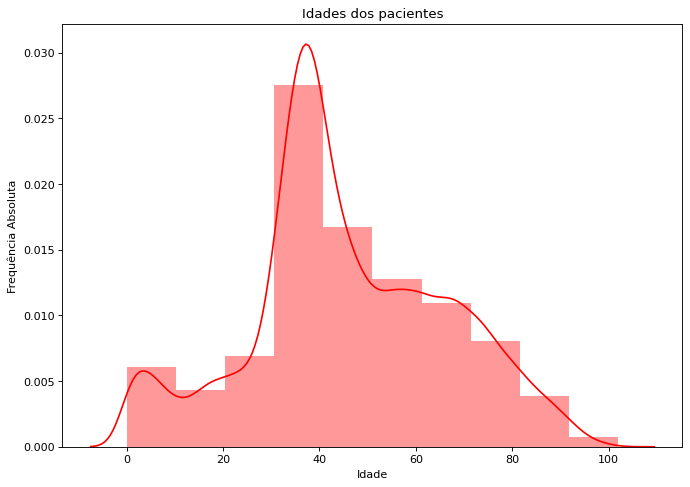

In [147]:
#Histograma da idade dos pacientes atendidos pelo centro cirúrgico
fig = plt.figure(figsize=(10, 7), dpi= 80)
sns.distplot(dataset['idade'], bins=10, kde=True, color = 'red')
plt.title('Idades dos pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')


# 4.2 Sexo dos pacientes

In [67]:
# Sexo dos pacientes
dataset['sexo'] = dataset['sexo'].str.lower()
dataset['sexo'].value_counts()

feminino        24254
masculino       15213
desconhecido        1
Name: sexo, dtype: int64

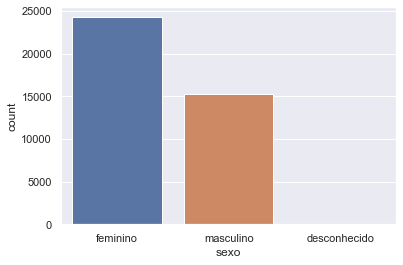

In [68]:
#Gráfico de colunas sexo dos pacientes
dataset['sexo'] = dataset['sexo'].str.lower()
sns.set(style="darkgrid")
ax = sns.countplot(x="sexo", data=dataset)

# 4.3 Procedimentos cirúrgicos mais realizados

In [69]:
# Procedimentos cirúrgicos mais realizados
print("\n Quantidade de procedimentos cirúrgicos mais realizados:")
dataset['procedimento_cirurgico'].value_counts()


 Quantidade de procedimentos cirúrgicos mais realizados,


cesariana                                                                                                 4499
parto (via vaginal)                                                                                       2982
facectomia com lente intra-ocular com facoemulsificaÃ§Ã£o                                                 1611
colecistectomia com colangiografia por videolaparoscopia                                                  1387
apendicectomia por videolaparoscopia                                                                      1107
                                                                                                          ... 
implante de marca-passo monocameral (gerador + eletrodo atrial ou ventricular)                               1
implante de endoprÃ³tese em aneurisma de aorta abdominal ou torÃ¡cica com stent revestido (stent-graft       1
implante de eletrodo cerebral profundo                                                                       1
h

# 4.4 Tipos de atendimentos e passagens 

In [77]:
# Tipos de atendimento
print("\n Tipo de atendimento")
dataset['tipo_atendimento'].value_counts()


 Tipo de atendimento


clinica cirurgica                           15990
obstetricia                                  7666
clinica medica                               6034
cirurgia day clinic                          5183
pediatria                                    1534
day clinic                                    705
uti adulto                                    682
uti semi intensiva adulto                     401
litotripsia                                   310
neonatal                                      261
suite/obstetricia                             252
excimer laser                                 166
uti pediatrico                                138
oncologia - internos                           22
nÃ£o informado                                 20
ambulatÃ³rio unidade vila santa catarina       16
uti semi intensiva pediatrica                  14
transplante de medula                          14
servico apoio diagnostico                       9
primeiro atendimento                            7


<AxesSubplot:>

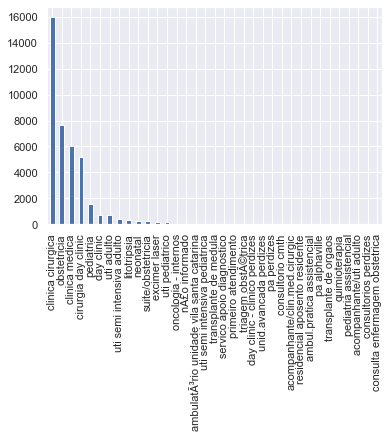

In [78]:
#Gráfico de barras de tipo de atendimento
dataset["tipo_atendimento"].value_counts().plot.bar()

In [79]:
# Tipos de passagem
print("\n Tipos de passagem")
dataset['tipo_passagem'].value_counts()


 Tipos de passagem


internado      38204
externo         1241
emergÃªncia       23
Name: tipo_passagem, dtype: int64

<AxesSubplot:>

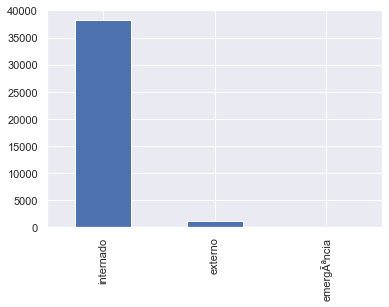

In [82]:
#Gráfico de barras de tipo de passagem
dataset["tipo_passagem"].value_counts().plot.bar()

# 4.5 Porte das cirurgias realizadas

In [70]:
# Porte dos procedimentos cirúrgicos
print("\n Porte das cirurgias")
dataset['porte'].value_counts()


 Porte das cirurgias


p3                16420
p2                 6062
p4                 5262
p1                 4817
p5                 2086
nÃ£o informado     1359
p0                 1329
p8                  698
p6                  612
p7                  241
Name: porte, dtype: int64

<AxesSubplot:>

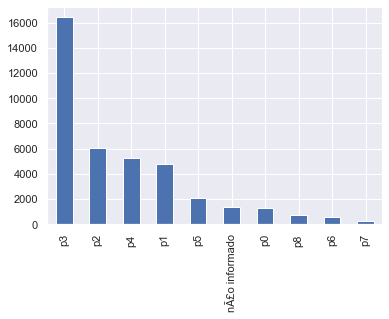

In [75]:
#Gráfico de barras do porte
dataset["porte"].value_counts().plot.bar()

# 4.6 Especialidades dos procedimentos

In [83]:
# Especialidades dos procedimentos cirúrgicos realizados
print("\n Especialidades dos procedimentos")
dataset['especialidade_procedimento'].value_counts()


 Especialidades dos procedimentos


ginecologia e obstetrÃ­cia              9791
cirurgia geral                          5736
urologia                                4876
oftalmologia                            3088
plÃ¡stica                               2186
cirurgia vascular                       2160
ortopedia                               1970
nÃ£o informado                          1720
dermatologia/plÃ¡stica                  1099
cabeÃ§a e pescoÃ§o                       876
neurocirurgia                            782
otorrinolaringologia                     750
anestesiologia                           704
proctologia                              645
dermatologia                             569
cardiovascular                           352
cirurgia torÃ¡cica                       334
ortopedia/neurocirurgia                  274
neurocirurgia/ortopedia                  172
mastologia                               148
cirurgia pediÃ¡trica                     122
cirurgia plÃ¡stica                       117
outra     

# 4.7 Quantidade de procedimentos realizados por médicos

In [84]:
# Quantidade de procedimentos realizados por profissionais médicos
print("\n Quantidade de procedimentos realizados por profissionais médicos")
dataset['medico'].value_counts()


 Especialidades dos procedimentos


CauÃª da Mota         568
Vitor Viana           555
Rodrigo Cavalcanti    540
Sofia Nunes           490
Clarice Cardoso       475
                     ... 
Guilherme Duarte        1
Lorenzo Vieira          1
Daniela da Luz          1
BÃ¡rbara Rodrigues      1
Stella Caldeira         1
Name: medico, Length: 2466, dtype: int64

# 4.8 Tempo de duração das cirurgias

In [104]:
# Criando uma nova coluna no dataset
dataset['temp_duracao_cirurgia'] = 0

In [105]:
#Função utilizada para calcular tempo(segundos) de duração da cirurgia 
from datetime import datetime
def diferencia_segundos(s,t):
    f = '%Y-%m-%d %H:%M:%S'
    dif = (datetime.strptime(t, f)- datetime.strptime(s, f))
    return(dif.total_seconds())

In [106]:
#Excluir linhas da coluna data_saida com valor nulo
dataset= dataset.dropna(subset=["data_saida"])

In [107]:
#Incluindo dados na coluna temp_duracao_cirurgia
for index, row in dataset.iterrows():          
            dataset.loc[index,'temp_duracao_cirurgia'] =  diferencia_segundos(dataset.loc[index,'data_entrada'],dataset.loc[index,'data_saida'])

In [108]:
# Sumário estatístico de tempo de cirurgia
dataset.describe()


,Unnamed: 0,sexo_cod,tipo_atendimento_cod,tipo_passagem_cod,procedimento_cirurgico_cod,especialidade_procedimento_cod,tecnica_cirurgica_cod,potencial_contaminacao_cod,porte_cod,especialidade_cirurgiao_cod,intercorrencia_intraop_cod,tipo_intercorrencia_intraop_cod,idade,temp_duracao_cirurgia
count,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,3.912900e+04
mean,17659.545018,1.386695,8.635462,1.967594,526.998799,30.117739,2.136088,0.642107,3.686038,18.398400,0.120678,14.849907,45.729919,9.841703e+03
std,10227.548401,0.487052,6.135441,0.179941,328.649358,16.484864,2.308093,0.676482,1.673943,8.380214,0.415780,1.107994,20.625939,7.897871e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-8.296500e+04
25%,8791.000000,1.000000,5.000000,2.000000,185.000000,16.000000,0.000000,0.000000,3.000000,11.000000,0.000000,15.000000,34.000000,4.124000e+03
50%,17598.000000,1.000000,5.000000,2.000000,555.000000,26.000000,3.000000,1.000000,4.000000,19.000000,0.000000,15.000000,42.000000,6.132000e+03
75%,26488.000000,2.000000,15.000000,2.000000,789.000000,42.000000,3.000000,1.000000,4.000000,26.000000,0.000000,15.000000,61.000000,9.720000e+03
max,35493.000000,2.000000,34.000000,2.000000,1173.000000,58.000000,9.000000,3.000000,9.000000,32.000000,2.000000,21.000000,102.000000,1.391608e+07


# 5. Verificando dados nulos

In [92]:
# Verificando os valores nulos
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

# Calculando o percentual de valores nulos
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# Visualizar os dados formatados
dataset_missing_values

,Null,Not Null,Percentage
potencial_contaminacao,1350,37779,3.450127
porte,582,38547,1.487388
Unnamed: 0,0,39129,0.000000
tipo_intercorrencia_intraop,0,39129,0.000000
intercorrencia_intraop_cod,0,39129,0.000000
especialidade_cirurgiao_cod,0,39129,0.000000
porte_cod,0,39129,0.000000
potencial_contaminacao_cod,0,39129,0.000000
tecnica_cirurgica_cod,0,39129,0.000000
especialidade_procedimento_cod,0,39129,0.000000


Text(0.5, 1.0, 'Missing Data in our Dataset')

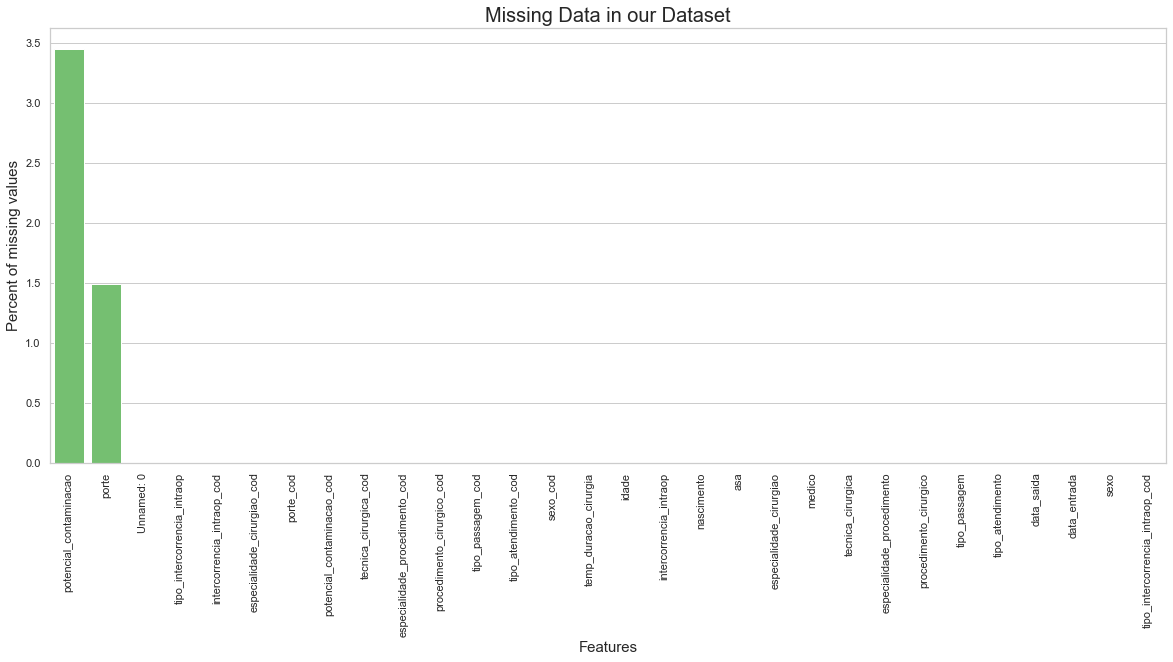

In [90]:
#Verificando colunas com valores nulos no dataset
sns.set(style="whitegrid")

# Inicializando o matplotlib 
fig, axs = plt.subplots(figsize=(20,8))

# plot the Total Missing Values
sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Percentage", data=dataset_missing_values, color="g")

# customizing Bar Graph
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Missing Data in our Dataset', fontsize=20)

# 6.Features e target

<AxesSubplot:xlabel='temp_duracao_cirurgia', ylabel='Density'>

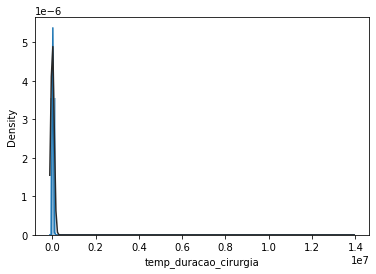

In [109]:
# Distribuição do tempo de duração da cirurgia(Target)
sns.distplot(dataset.temp_duracao_cirurgia, fit = stats.norm)

In [71]:
#Mediana do tempo de duração da cirurgia
print('Média:',dataset['temp_duracao_cirurgia'].mean())
print('Mediana:',dataset['temp_duracao_cirurgia'].median())

Média: 9841.703468016049
Mediana: 6132.0


<AxesSubplot:xlabel='intercorrencia_intraop_cod', ylabel='Density'>

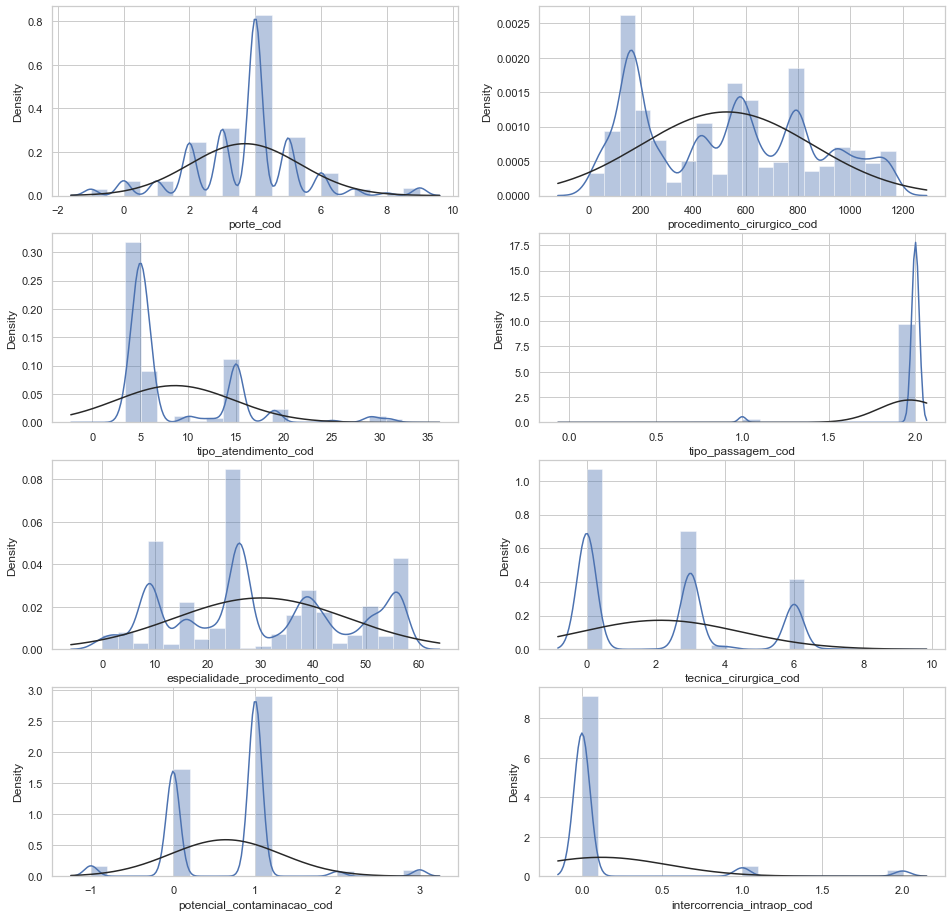

In [122]:
#Distribuição das features
fig, ax = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(dataset.porte_cod, bins = 20, fit = stats.norm, ax = ax[0, 0])
sns.distplot(dataset.procedimento_cirurgico_cod, bins = 20, fit = stats.norm, ax = ax[0, 1])
sns.distplot(dataset.tipo_atendimento_cod, bins = 20, fit = stats.norm, ax = ax[1, 0])
sns.distplot(dataset.tipo_passagem_cod, bins = 20, fit = stats.norm, ax = ax[1, 1])
sns.distplot(dataset.especialidade_procedimento_cod, bins = 20, fit = stats.norm, ax = ax[2, 0])
sns.distplot(dataset.tecnica_cirurgica_cod, bins = 20, fit = stats.norm, ax = ax[2, 1])
sns.distplot(dataset.potencial_contaminacao_cod, bins = 20, fit = stats.norm, ax = ax[3, 0])
sns.distplot(dataset.intercorrencia_intraop_cod, bins = 20, fit = stats.norm, ax = ax[3, 1])

<AxesSubplot:xlabel='temp_duracao_cirurgia', ylabel='especialidade_cirurgiao'>

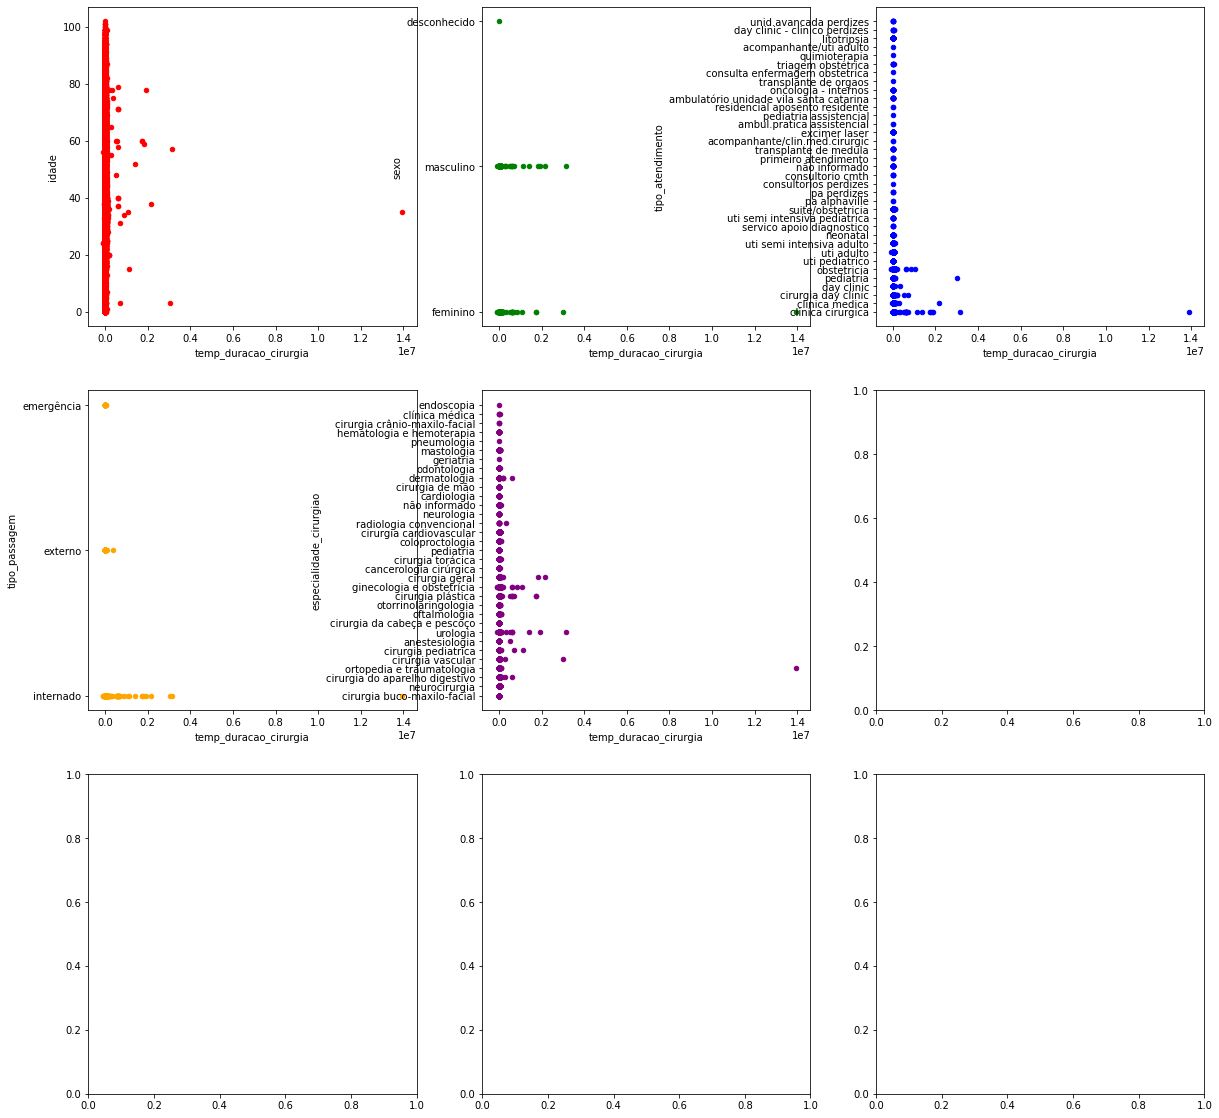

In [16]:
# Visualizando a relação entre as features e targets usando scatterplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
dataset.plot(kind='scatter', x='temp_duracao_cirurgia', y='idade',ax=axs[0,0], c='red')
dataset.plot(kind='scatter',  x='temp_duracao_cirurgia', y='sexo', ax=axs[0,1], c='green')
dataset.plot(kind='scatter', x='temp_duracao_cirurgia', y='tipo_atendimento',ax=axs[0,2], c='blue')
dataset.plot(kind='scatter',  x='temp_duracao_cirurgia', y='tipo_passagem', ax=axs[1,0], c='orange')
dataset.plot(kind='scatter', x='temp_duracao_cirurgia', y='especialidade_cirurgiao',ax=axs[1,1], c='purple')

<AxesSubplot:>

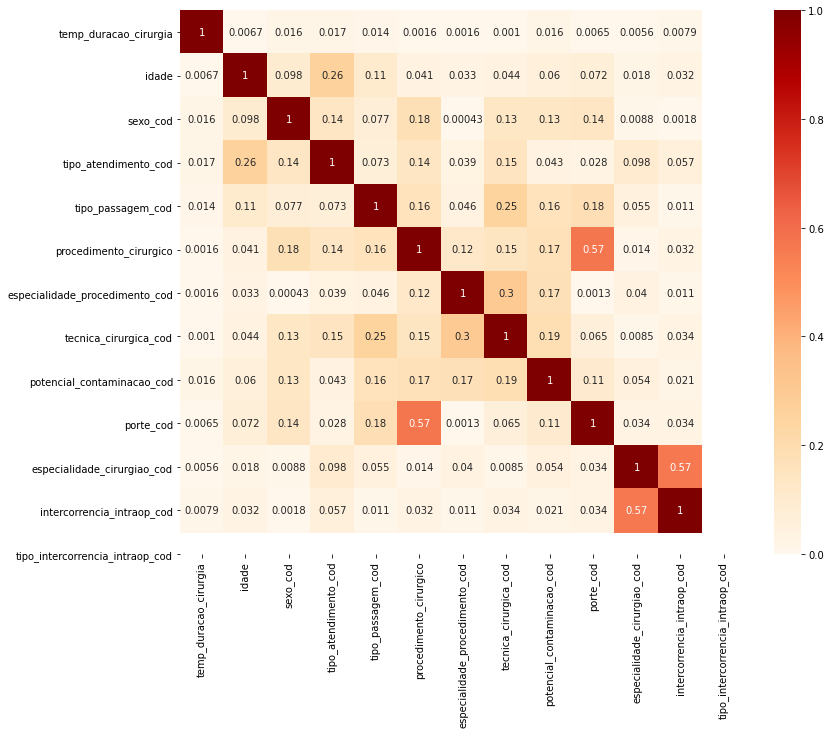

In [72]:
# Visualizar a matriz de correlação usando heatmap
corr_matrix = abs(dataset.corr())

#Correlação com a target
corr_target = corr_matrix['temp_duracao_cirurgia']

#Selecionando as features com maior correlação
relevant_features = ['temp_duracao_cirurgia','idade','sexo_cod','tipo_atendimento_cod','tipo_passagem_cod','procedimento_cirurgico','especialidade_procedimento_cod',
'tecnica_cirurgica_cod','potencial_contaminacao_cod','porte_cod','especialidade_cirurgiao_cod','intercorrencia_intraop_cod',
'tipo_intercorrencia_intraop_cod']

# Plotando a matriz
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

# 7. Limpeza de dados

In [110]:
#Exluir colunas com valores em texto e deixar apenas a variáveis categorizadas
dataset.drop(columns=['Unnamed: 0',
                      'nascimento',
                      'sexo',
                      'data_entrada',
                      'data_saida',
                      'tipo_atendimento',
                      'tipo_passagem',
                      'procedimento_cirurgico',
                      'especialidade_procedimento',
                      'tecnica_cirurgica',
                      'potencial_contaminacao',
                      'porte',
                      'medico',
                      'especialidade_cirurgiao',
                      'asa',
                      'intercorrencia_intraop',
                      'tipo_intercorrencia_intraop'], inplace=True)


# 8.Preparando os dados para Machine Learning

In [111]:
dataset.shape

(39129, 13)

In [112]:
#Preparando os dados para os algorritmos de machine learning
from scipy import stats

In [118]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

array = dataset.values

# features [X] e label [y]
X = array[:, 0:12]
y = array[:, 12]

# Transformando os dados
transformer = StandardScaler()
standardX = transformer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados originais:\n\n", X)
print("\nDados transformados:\n\n", standardX)

Dados originais:

 [[ 1  5  2 ...  0 15 22]
 [ 1  5  2 ...  0 15 54]
 [ 2  6  2 ...  0 15 54]
 ...
 [ 1 15  2 ...  0 15 46]
 [ 1  4  2 ...  0 15  5]
 [ 1  6  2 ...  0 15 43]]

Dados transformados:

 [[-0.7939616  -0.59254235  0.18009309 ... -0.2902483   0.13546574
  -1.15050386]
 [-0.7939616  -0.59254235  0.18009309 ... -0.2902483   0.13546574
   0.4009605 ]
 [ 1.25923537 -0.4295528   0.18009309 ... -0.2902483   0.13546574
   0.4009605 ]
 ...
 [-0.7939616   1.03735315  0.18009309 ... -0.2902483   0.13546574
   0.01309441]
 [-0.7939616  -0.7555319   0.18009309 ... -0.2902483   0.13546574
  -1.97471929]
 [-0.7939616  -0.4295528   0.18009309 ... -0.2902483   0.13546574
  -0.13235537]]


<AxesSubplot:>

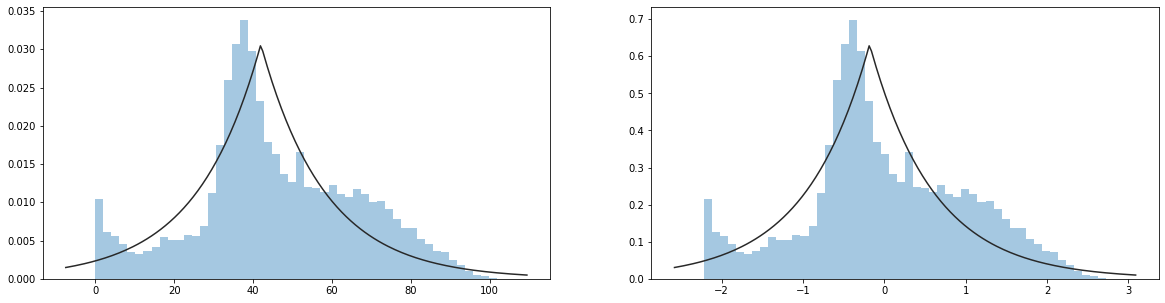

In [119]:
# Visualização com Seaborn (mudar o índice da coluna para visualizar demais atributos)

X2view = 11 # index da feature(idade) para ser visualizada

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.distplot(X[:, X2view], fit = stats.laplace, kde = False, ax = ax[0])
sns.distplot(standardX[:, X2view], fit = stats.laplace, kde = False, ax = ax[1])

In [120]:
# MinMaxScaler (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

array = dataset.values

# features [X] e label [y]
X = array[:, 0:12]
y = array[:, 12]

# Transformando os dados
transformer = MinMaxScaler(feature_range = (0, 1))
rescaledX = transformer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados originais:\n\n", X)
print("\nDados transformados:\n\n", rescaledX)

Dados originais:

 [[ 1  5  2 ...  0 15 22]
 [ 1  5  2 ...  0 15 54]
 [ 2  6  2 ...  0 15 54]
 ...
 [ 1 15  2 ...  0 15 46]
 [ 1  4  2 ...  0 15  5]
 [ 1  6  2 ...  0 15 43]]

Dados transformados:

 [[0.5        0.14705882 1.         ... 0.         0.71428571 0.21568627]
 [0.5        0.14705882 1.         ... 0.         0.71428571 0.52941176]
 [1.         0.17647059 1.         ... 0.         0.71428571 0.52941176]
 ...
 [0.5        0.44117647 1.         ... 0.         0.71428571 0.45098039]
 [0.5        0.11764706 1.         ... 0.         0.71428571 0.04901961]
 [0.5        0.17647059 1.         ... 0.         0.71428571 0.42156863]]


<AxesSubplot:>

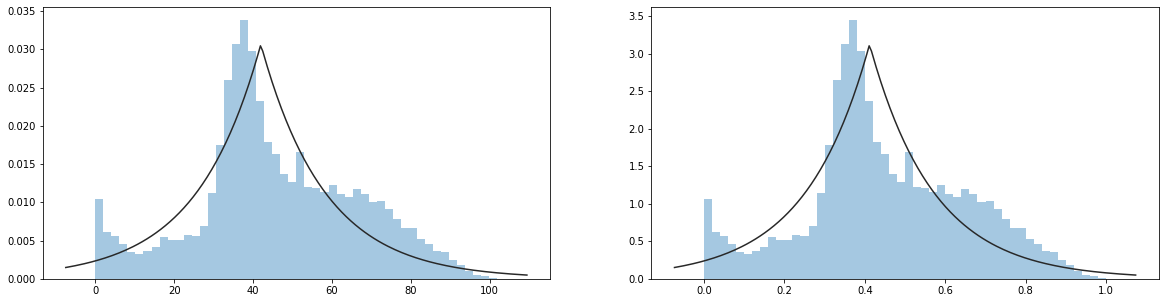

In [122]:
# Visualização com Seaborn (mudar o índice da coluna para visualizar demais atributos)

X2view = 11 # index da feature(idade) para ser visualizada

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.distplot(X[:, X2view], fit = stats.laplace, kde = False, ax = ax[0])
sns.distplot(rescaledX[:, X2view], fit = stats.laplace, kde = False, ax = ax[1])

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39129 entries, 0 to 39467
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   sexo_cod                         39129 non-null  int8 
 1   tipo_atendimento_cod             39129 non-null  int8 
 2   tipo_passagem_cod                39129 non-null  int8 
 3   procedimento_cirurgico_cod       39129 non-null  int16
 4   especialidade_procedimento_cod   39129 non-null  int8 
 5   tecnica_cirurgica_cod            39129 non-null  int8 
 6   potencial_contaminacao_cod       39129 non-null  int8 
 7   porte_cod                        39129 non-null  int8 
 8   especialidade_cirurgiao_cod      39129 non-null  int8 
 9   intercorrencia_intraop_cod       39129 non-null  int8 
 10  tipo_intercorrencia_intraop_cod  39129 non-null  int8 
 11  idade                            39129 non-null  int64
 12  temp_duracao_cirurgia            39129 non-nul

ranking das features:

1. feature 0 - sexo_cod (1.000000)
2. feature 1 - tipo_atendimento_cod (1.000000)
3. feature 2 - tipo_passagem_cod (1.000000)
4. feature 3 - procedimento_cirurgico_cod (1.000000)
5. feature 4 - especialidade_procedimento_cod (1.000000)
6. feature 5 - tecnica_cirurgica_cod (1.000000)
7. feature 6 - potencial_contaminacao_cod (1.000000)
8. feature 7 - porte_cod (1.000000)
9. feature 8 - especialidade_cirurgiao_cod (1.000000)
10. feature 9 - intercorrencia_intraop_cod (1.000000)
11. feature 10 - tipo_intercorrencia_intraop_cod (1.000000)


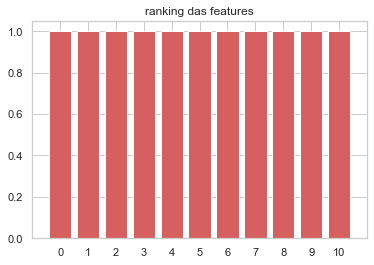

In [179]:
#Criando o ranking das features
# Import dos módulos
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = dataset.values

# features [X] e label [y]
X = array[:, 0:11]
y = array[:, 11]

# Criação do modelo
modelo = LogisticRegression(max_iter=500) # parâmetro "max_iter" acrescentado devido às mensagens geradas

# RFE
rfe = RFE(modelo, n_features_to_select=16) # Se "n_features_to_select=None", metade das features são selecionadas
fit = rfe.fit(X, y)

# Imprimindo os resultados
importances = rfe.ranking_
indices = np.argsort(importances)[::]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], dataset.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [181]:
# ExtraTreesClassifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier

array = dataset.values

# features [X] e label [y]
X = array[:, 0:11]
y = array[:, 11]


# Tratamento da aleatoriedade para garantir que os mesmos ddados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 7

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier(random_state=seed)
modelo.fit(X, y)

# Imprimindo os resultados
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], dataset.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


MemoryError: could not allocate 27000832 bytes

In [125]:
# Calculando VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = dataset.columns[0:12]

vif.round(1)

,VIF Factor,features
0,9.7,sexo_cod
1,3.4,tipo_atendimento_cod
2,90.7,tipo_passagem_cod
3,3.8,procedimento_cirurgico_cod
4,7.0,especialidade_procedimento_cod
5,2.1,tecnica_cirurgica_cod
6,2.4,potencial_contaminacao_cod
7,6.4,porte_cod
8,8.9,especialidade_cirurgiao_cod
9,1.3,intercorrencia_intraop_cod


In [126]:
#Ecluir variável com multicolinearidade
dataset.drop(columns=['tipo_intercorrencia_intraop_cod'], inplace=True)


In [128]:
# Calculando VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = dataset.columns[0:12]

vif.round(1)

,VIF Factor,features
0,9.7,sexo_cod
1,3.4,tipo_atendimento_cod
2,90.7,tipo_passagem_cod
3,3.8,procedimento_cirurgico_cod
4,7.0,especialidade_procedimento_cod
5,2.1,tecnica_cirurgica_cod
6,2.4,potencial_contaminacao_cod
7,6.4,porte_cod
8,8.9,especialidade_cirurgiao_cod
9,1.3,intercorrencia_intraop_cod


# 8.1. Criando arquivo de treinamento e teste

In [139]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dataset.values

# features [X] e label [y]
X = array[:, 0:11]
# X = rescaledX
# X = normalizedX
# X = standardX
y = array[:,11]

# Definindo o tamanho das amostras
teste_size = 0.33

# Tratamento da aleatoriedade para garantir que os mesmos ddados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criação do modelo
modelo = LogisticRegression(max_iter=500)

# Treinamento do modelo através dos dados de treino
modelo.fit(X_treino, y_treino)

# Avaliação do modelo do modelo através dos dados de teste
result = modelo.score(X_teste, y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))
#Acurácia nos Dados de Teste: 97.026%

MemoryError: Unable to allocate 1.07 GiB for an array with shape (26216, 10985) and data type int32

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39468 entries, 0 to 39467
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   sexo_cod                         39468 non-null  int8 
 1   tipo_atendimento_cod             39468 non-null  int8 
 2   tipo_passagem_cod                39468 non-null  int8 
 3   procedimento_cirurgico_cod       39468 non-null  int16
 4   especialidade_procedimento_cod   39468 non-null  int8 
 5   tecnica_cirurgica_cod            39468 non-null  int8 
 6   potencial_contaminacao_cod       39468 non-null  int8 
 7   porte_cod                        39468 non-null  int8 
 8   especialidade_cirurgiao_cod      39468 non-null  int8 
 9   intercorrencia_intraop_cod       39468 non-null  int8 
 10  tipo_intercorrencia_intraop_cod  39468 non-null  int8 
 11  idade                            39468 non-null  int64
 12  temp_duracao_cirurgia            39468 non-nul

In [133]:
# Avaliação usando Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = dataset.values

# features [X] e label [y]
X = array[:, 0:11]
# X = rescaledX
# X = normalizedX
# X = standardX
y = array[:, 11]

# Definindo os valores para o número de folds
num_folds = 10

# Tratamento da aleatoriedade para garantir que os mesmos ddados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 7

# Separando os dados em folds
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression(max_iter=500)
# Treinamento do modelo através dos dados de treino e avaliação o modelo através dos dados de teste
resultado = cross_val_score(modelo, X, y, cv = kfold)

# Print do resultado
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))
#Acurácia Final: 96.972%

IndexError: index 12 is out of bounds for axis 1 with size 12

LR: nan (nan)
LDA: 0.013545 (0.001153)
NB: 0.028265 (0.003592)
KNN: 0.076823 (0.004856)
CART: nan (nan)


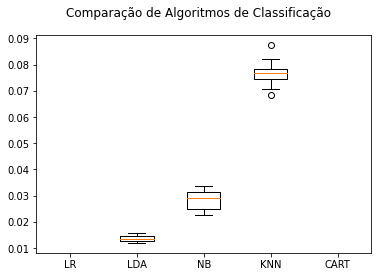

In [142]:
#Seleção do modelo preditivo
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

array = dataset.values

# features [X] e label [y]
X = array[:, 0:11]
# X = rescaledX
# X = normalizedX
# X = standardX
y = array[:, 11]

# Definindo os valores para o número de folds
num_folds = 12

# Tratamento da aleatoriedade para garantir que os mesmos ddados sejam sempre reproduzidos da mesma maneira
# Importante para garantir a justa comparação de performance entre os algoritmos de Machine Learning
seed = 7

# Preparando a lista de algoritmos
modelos = []
modelos.append(('LR', LogisticRegression(random_state = seed, max_iter=500)))
modelos.append(('LDA', LinearDiscriminantAnalysis())) # não possui o parâmetro "random_state"
modelos.append(('NB', GaussianNB())) # não possui o parâmetro "random_state"
modelos.append(('KNN', KNeighborsClassifier())) # não possui o parâmetro "random_state"
modelos.append(('CART', DecisionTreeClassifier(random_state = seed)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()
#LR: 0.969715 (0.004446)
#LDA: 0.978686 (0.002941)
#NB: 0.952158 (0.007978)
#KNN: 0.966444 (0.004429)
#CART: 0.976437 (0.002923)

# 9.Conclusão


Através da matriz de correlação, foi possível observar que as variáveis que mais se relacionam com o target(temp_duracao_cirurgia) são: porte, procedimento_cirurgico e especialidade_cirurgiao. A variável intercorrencia_intraop_cod apresenta uma alta colinearidade, mas foi observado que o seu valor se repete, sendo assim, foi retirada do dataset para análise. 
A acurácia dos dados de teste obtida foi 97,026% e acurácia final 96.972%. 
O algoritmo de classificação que apresentou melhor desempenho foi o KART com 97,64% de acurácia.
